In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **CS224W - Colab 2**

In this Colab, we will construct our own graph neural network by using PyTorch Geometric (PyG) and apply the model on two of Open Graph Benchmark (OGB) datasets. Those two datasets are used to benchmark the model performance on two different graph-related tasks. One is node property prediction, predicting properties of single nodes. Another one is graph property prediction, predicting the entire graphs or subgraphs.  
在此 Colab 中，我们将使用 PyTorch Geometric (PyG) 构建我们自己的图神经网络，并将模型应用于两个开放图基准 (OGB) 数据集。 这两个数据集用于在两个不同的图相关任务上对模型性能进行基准测试。 一种是节点属性预测，预测单个节点的属性。 另一种是图属性预测，预测整个图或子图。

At first, we will learn how PyTorch Geometric stores the graphs in PyTorch tensor.  
首先，我们将学习 PyTorch Geometric 如何在 PyTorch 张量中存储图形。

We will then load and take a quick look on one of the Open Graph Benchmark (OGB) datasets by using the `ogb` package. OGB is a collection of realistic, large-scale, and diverse benchmark datasets for machine learning on graphs. The `ogb` package not only provides the data loader of the dataset but also the evaluator.  
然后，我们将使用 ogb 包加载并快速查看其中一个开放图谱基准 (OGB) 数据集。 OGB 是用于图机器学习的现实、大规模和多样化的基准数据集的集合。 ogb 包不仅提供数据集的数据加载器，还提供评估器。

At last, we will build our own graph neural networks by using PyTorch Geometric. And then apply and evaluate the models on node property prediction and grpah property prediction tasks.  
最后，我们将使用 PyTorch Geometric 构建我们自己的图神经网络。 然后在节点属性预测和 grpah 属性预测任务上应用和评估模型。

**Note**: Make sure to **sequentially run all the cells in each section**, so that the intermediate variables / packages will carry over to the next cell  
注意：确保顺序运行每个部分中的所有单元格，以便中间变量/包会延续到下一个单元格

在 Colab 2 上玩得开心 :)

Have fun on Colab 2 :)

# Device
You might need to use GPU for this Colab.

Please click `Runtime` and then `Change runtime type`. Then set the `hardware accelerator` to **GPU**.  
请单击运行时，然后更改运行时类型。 然后将硬件加速器设置为GPU。

# Installation

In [2]:
import torch
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 1.9.0+cu102


In [3]:
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html       #1.7.0+cu101
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-geometric
!pip install ogb

     |████████████████████████████████| 2.6MB 4.1MB/s 
     |████████████████████████████████| 1.4MB 3.4MB/s 
     |████████████████████████████████| 225kB 7.1MB/s 
     |████████████████████████████████| 235kB 42.5MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 71kB 4.2MB/s 
  Created wheel for littleutils: filename=littleutils-0.2.2-cp37-none-any.whl size=7050 sha256=067440172dfb4b914a642f0872bca73b93712b6c941746ff8cdff14b27e0bf9f
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built littleutils


# 1 PyTorch Geometric (Datasets and Data)


PyTorch Geometric generally has two classes for storing or transforming the graphs into tensor format. One is the `torch_geometric.datasets`, which contains a variety of common graph datasets. Another one is `torch_geometric.data` that provides the data handling of graphs in PyTorch tensors.  
PyTorch Geometric 通常有两个类用于存储图形或将图形转换为张量格式。 一个是torch_geometric.datasets，它包含各种常见的图形数据集。 另一个是 torch_geometric.data，它提供 PyTorch 张量中图形的数据处理。

In this section, we will learn how to use the `torch_geometric.datasets` and `torch_geometric.data`.  
在本节中，我们将学习如何使用 torch_geometric.datasets 和 torch_geometric.data。

## PyG Datasets

The `torch_geometric.datasets` has many common graph datasets. Here we will explore the usage by using one example dataset.  
torch_geometric.datasets 有许多常见的图形数据集。 在这里，我们将使用一个示例数据集来探索用法。

In [4]:
from torch_geometric.datasets import TUDataset

root = './enzymes'
name = 'ENZYMES'

# The ENZYMES dataset
pyg_dataset= TUDataset('./enzymes', 'ENZYMES')

# You can find that there are 600 graphs in this dataset
print(pyg_dataset)

Extracting enzymes/ENZYMES/ENZYMES.zip
Processing...
Done!
ENZYMES(600)


In [5]:
# Import the NetworkX package
# import networkx as nx

AttributeError: ignored

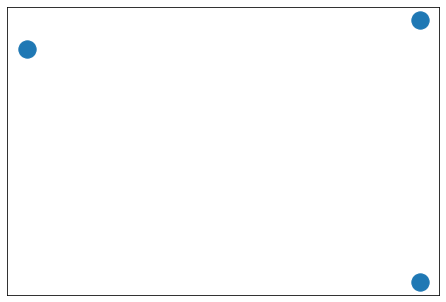

In [8]:
# Draw the graph
# nx.draw(pyg_dataset[0], with_labels = False)

## Question 1: What is the number of classes and number of features in the ENZYMES dataset? (5 points)  
问题 1：ENZYMES 数据集中的类数和特征数是多少？ (5 分)

In [6]:
def get_num_classes(pyg_dataset):
  # TODO: Implement this function that takes a PyG dataset object
  # and return the number of classes for that dataset.

  num_classes = 0

  ############# Your code here ############
  ## (~1 line of code)
  ## Note
  ## 1. Colab autocomplete functionality might be useful.
  num_classes = pyg_dataset.num_classes
  #########################################

  return num_classes

def get_num_features(pyg_dataset):
  # TODO: Implement this function that takes a PyG dataset object
  # and return the number of features for that dataset.

  num_features = 0

  ############# Your code here ############
  ## (~1 line of code)
  ## Note
  ## 1. Colab autocomplete functionality might be useful.
  num_features = pyg_dataset.num_features
  #########################################

  return num_features

# You may find that some information need to be stored in the dataset level,
# specifically if there are multiple graphs in the dataset

num_classes = get_num_classes(pyg_dataset)
num_features = get_num_features(pyg_dataset)
print("{} dataset has {} classes".format(name, num_classes))
print("{} dataset has {} features".format(name, num_features))

ENZYMES dataset has 6 classes
ENZYMES dataset has 3 features


## PyG Data

Each PyG dataset usually stores a list of `torch_geometric.data.Data` objects. Each `torch_geometric.data.Data` object usually represents a graph. You can easily get the `Data` object by indexing on the dataset.  
每个 PyG 数据集通常存储一个 torch_geometric.data.Data 对象列表。 每个 torch_geometric.data.Data 对象通常代表一个图形。 您可以通过对数据集进行索引来轻松获取 Data 对象。

For more information such as what will be stored in `Data` object, please refer to the [documentation](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data).  
有关更多信息，例如将存储在 Data 对象中的内容，请参阅文档。

## Question 2: What is the label of the graph (index 100 in the ENZYMES dataset)? (5 points)  
问题 2：图的标签是什么（ENZYMES 数据集中的索引 100）？ (5 分)

In [23]:
def get_graph_class(pyg_dataset, idx):
  # TODO: Implement this function that takes a PyG dataset object,
  # the index of the graph in dataset, and returns the class/label 
  # of the graph (in integer).

  label = -1

  ############# Your code here ############
  ## (~1 line of code)
  label = pyg_dataset[idx].y[0]
  #########################################

  return label

# Here pyg_dataset is a dataset for graph classification
graph_0 = pyg_dataset[0]
print(graph_0)
idx = 100
label = get_graph_class(pyg_dataset, idx)
print('Graph with index {} has label {}'.format(idx, label))

Data(edge_index=[2, 168], x=[37, 3], y=[1])
Graph with index 100 has label 4


## Question 3: What is the number of edges for the graph (index 200 in the ENZYMES dataset)? (5 points)  
问题 3：图的边数是多少（ENZYMES 数据集中的索引 200）？ (5 分)

In [29]:
def get_graph_num_edges(pyg_dataset, idx):
  # TODO: Implement this function that takes a PyG dataset object,
  # the index of the graph in dataset, and returns the number of 
  # edges in the graph (in integer). You should not count an edge 
  # twice if the graph is undirected. For example, in an undirected 
  # graph G, if two nodes v and u are connected by an edge, this edge
  # should only be counted once.

  num_edges = 0

  ############# Your code here ############
  ## Note:
  ## 1. You can't return the data.num_edges directly
  ## 2. We assume the graph is undirected
  ## (~4 lines of code)
  num_edges = pyg_dataset[idx].num_edges/2
  num_edges=int(num_edges)
  #########################################

  return num_edges

idx = 200
num_edges = get_graph_num_edges(pyg_dataset, idx)
print('Graph with index {} has {} edges'.format(idx, num_edges))

Graph with index 200 has 53 edges


# 2 Open Graph Benchmark (OGB)

The Open Graph Benchmark (OGB) is a collection of realistic, large-scale, and diverse benchmark datasets for machine learning on graphs. Its datasets are automatically downloaded, processed, and split using the OGB Data Loader. The model performance can also be evaluated by using the OGB Evaluator in a unified manner.  
Open Graph Benchmark (OGB) 是一组用于图机器学习的真实、大规模和多样化的基准数据集。 使用 OGB 数据加载器自动下载、处理和拆分其数据集。 也可以使用 OGB Evaluator 统一评估模型性能。

## Dataset and Data

OGB also supports the PyG dataset and data. Here we take a look on the `ogbn-arxiv` dataset.  
OGB 还支持 PyG 数据集和数据。 这里我们看一下 ogbn-arxiv 数据集。

In [30]:
import torch_geometric.transforms as T      # 在计算机视觉领域是一种很常见的数据增强。
from ogb.nodeproppred import PygNodePropPredDataset

dataset_name = 'ogbn-arxiv'
# Load the dataset and transform it to sparse tensor加载数据集并将其转换为稀疏张量
dataset = PygNodePropPredDataset(name=dataset_name,
                                 transform=T.ToSparseTensor())
print('The {} dataset has {} graph'.format(dataset_name, len(dataset)))

# Extract the graph
data = dataset[0]
print(data)

  0%|          | 0/81 [00:00<?, ?it/s]

Downloaded 0.08 GB: 100%|██████████| 81/81 [00:01<00:00, 42.16it/s]


Extracting dataset/arxiv.zip
Processing...
Loading necessary files...
This might take a while.


100%|██████████| 1/1 [00:00<00:00, 3393.45it/s]

Processing graphs...
Converting graphs into PyG objects...
Saving...
Done!


The ogbn-arxiv dataset has 1 graph
Data(adj_t=[169343, 169343, nnz=1166243], node_year=[169343, 1], x=[169343, 128], y=[169343, 1])


## Question 4: What is the number of features in the ogbn-arxiv graph? (5 points)  
问题 4：ogbn-arxiv 图中的特征数量是多少？ (5 分)

In [31]:
def graph_num_features(data):
  # TODO: Implement this function that takes a PyG data object,
  # and returns the number of features in the graph (in integer).

  num_features = 0

  ############# Your code here ############
  ## (~1 line of code)
  num_features = data.num_features
  #########################################

  return num_features

num_features = graph_num_features(data)
print('The graph has {} features'.format(num_features))

The graph has 128 features


# 3 GNN: Node Property Prediction

In this section we will build our first graph neural network by using PyTorch Geometric and apply it on node property prediction (node classification).  
在本节中，我们将使用 PyTorch Geometric 构建我们的第一个图神经网络，并将其应用于节点属性预测（节点分类）。

We will build the graph neural network by using GCN operator ([Kipf et al. (2017)](https://arxiv.org/pdf/1609.02907.pdf)).  
我们将使用 GCN 算子（Kipf 等人（2017））构建图神经网络。
 
You should use the PyG built-in `GCNConv` layer directly.   
您应该直接使用 PyG 内置的 GCNConv 层。

## Setup

In [32]:
import torch
import torch.nn.functional as F
print(torch.__version__)

# The PyG built-in GCNConv
from torch_geometric.nn import GCNConv

import torch_geometric.transforms as T
from ogb.nodeproppred import PygNodePropPredDataset, Evaluator

1.9.0+cu102


## Load and Preprocess the Dataset

In [33]:
dataset_name = 'ogbn-arxiv'
dataset = PygNodePropPredDataset(name=dataset_name,
                                 transform=T.ToSparseTensor())
data = dataset[0]

# Make the adjacency matrix to symmetric使邻接矩阵对称,将非对称邻接矩阵转变为对称邻接矩阵
data.adj_t = data.adj_t.to_symmetric()

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# If you use GPU, the device should be cuda
print('Device: {}'.format(device))

data = data.to(device)
split_idx = dataset.get_idx_split()
train_idx = split_idx['train'].to(device)

Device: cuda


## GCN Model

Now we will implement our GCN model!  
现在我们将实现我们的 GCN 模型！


Please follow the figure below to implement your `forward` function.  
请按照下图来实现您的转发功能。


![test](https://drive.google.com/uc?id=128AuYAXNXGg7PIhJJ7e420DoPWKb-RtL)

In [34]:
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers,
                 dropout, return_embeds=False):
        # TODO: Implement this function that initializes self.convs, 
        # self.bns, and self.softmax.

        super(GCN, self).__init__()

        # A list of GCNConv layers
        self.convs = None

        # A list of 1D batch normalization layers
        self.bns = None

        # The log softmax layer
        self.softmax = None

        ############# Your code here ############
        ## Note:
        ## 1. You should use torch.nn.ModuleList for self.convs and self.bns
        ## 2. self.convs has num_layers GCNConv layers
        ## 3. self.bns has num_layers - 1 BatchNorm1d layers
        ## 4. You should use torch.nn.LogSoftmax for self.softmax
        ## 5. The parameters you can set for GCNConv include 'in_channels' and 
        ## 'out_channels'. More information please refer to the documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv
        ## 6. The only parameter you need to set for BatchNorm1d is 'num_features'
        ## More information please refer to the documentation: 
        ## https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html
        ## (~10 lines of code)
        self.convs = torch.nn.ModuleList(
            [GCNConv(in_channels=input_dim, out_channels=hidden_dim)] +
            [GCNConv(in_channels=hidden_dim, out_channels=hidden_dim)                             
                for i in range(num_layers-2)] + 
            [GCNConv(in_channels=hidden_dim, out_channels=output_dim)]    
        )

        self.bns = torch.nn.ModuleList([
            torch.nn.BatchNorm1d(num_features=hidden_dim) 
                for i in range(num_layers-1)
        ])

        self.softmax = torch.nn.LogSoftmax()
        
        #########################################

        # Probability of an element to be zeroed
        self.dropout = dropout

        # Skip classification layer and return node embeddings
        self.return_embeds = return_embeds

    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()
        for bn in self.bns:
            bn.reset_parameters()

    def forward(self, x, adj_t):
        # TODO: Implement this function that takes the feature tensor x,
        # edge_index tensor adj_t and returns the output tensor as
        # shown in the figure.

        out = None

        ############# Your code here ############
        ## Note:
        ## 1. Construct the network as showing in the figure
        ## 2. torch.nn.functional.relu and torch.nn.functional.dropout are useful
        ## More information please refer to the documentation:
        ## https://pytorch.org/docs/stable/nn.functional.html
        ## 3. Don't forget to set F.dropout training to self.training
        ## 4. If return_embeds is True, then skip the last softmax layer
        ## (~7 lines of code)
        for conv, bn in zip(self.convs[:-1], self.bns):
            x1 = F.relu(bn(conv(x, adj_t)))
            if self.training:
                x1 = F.dropout(x1, p=self.dropout)
            x = x1
        x = self.convs[-1](x, adj_t)  #GCNVonv
        out = x if self.return_embeds else self.softmax(x)
        #########################################

        return out

In [35]:
def train(model, data, train_idx, optimizer, loss_fn):
    # TODO: Implement this function that trains the model by 
    # using the given optimizer and loss_fn.
    model.train()
    loss = 0

    ############# Your code here ############
    ## Note:
    ## 1. Zero grad the optimizer
    ## 2. Feed the data into the model
    ## 3. Slicing the model output and label by train_idx
    ## 4. Feed the sliced output and label to loss_fn
    ## (~4 lines of code)
    optimizer.zero_grad()
    out = model(data.x, data.adj_t)
    loss = loss_fn(out[train_idx], data.y[train_idx].reshape(-1))
    #########################################

    loss.backward()
    optimizer.step()

    return loss.item()

In [36]:
# Test function here
@torch.no_grad()
def test(model, data, split_idx, evaluator):
    # TODO: Implement this function that tests the model by 
    # using the given split_idx and evaluator.
    model.eval()

    # The output of model on all data
    out = None

    ############# Your code here ############
    ## (~1 line of code)
    ## Note:
    ## 1. No index slicing here
    out=model(data.x,data.adj_t)
    #########################################

    y_pred = out.argmax(dim=-1, keepdim=True)

    train_acc = evaluator.eval({
        'y_true': data.y[split_idx['train']],
        'y_pred': y_pred[split_idx['train']],
    })['acc']
    valid_acc = evaluator.eval({
        'y_true': data.y[split_idx['valid']],
        'y_pred': y_pred[split_idx['valid']],
    })['acc']
    test_acc = evaluator.eval({
        'y_true': data.y[split_idx['test']],
        'y_pred': y_pred[split_idx['test']],
    })['acc']

    return train_acc, valid_acc, test_acc

In [37]:
# Please do not change the args
args = {
    'device': device,
    'num_layers': 3,
    'hidden_dim': 256,
    'dropout': 0.5,
    'lr': 0.01,
    'epochs': 100,
}
args

{'device': 'cuda',
 'dropout': 0.5,
 'epochs': 100,
 'hidden_dim': 256,
 'lr': 0.01,
 'num_layers': 3}

In [38]:
model = GCN(data.num_features, args['hidden_dim'],
            dataset.num_classes, args['num_layers'],
            args['dropout']).to(device)
evaluator = Evaluator(name='ogbn-arxiv')

In [39]:
import copy

# reset the parameters to initial random value
model.reset_parameters()

optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
loss_fn = F.nll_loss

best_model = None
best_valid_acc = 0

for epoch in range(1, 1 + args["epochs"]):
  loss = train(model, data, train_idx, optimizer, loss_fn)
  result = test(model, data, split_idx, evaluator)
  train_acc, valid_acc, test_acc = result
  if valid_acc > best_valid_acc:
      best_valid_acc = valid_acc
      best_model = copy.deepcopy(model)
  print(f'Epoch: {epoch:02d}, '
        f'Loss: {loss:.4f}, '
        f'Train: {100 * train_acc:.2f}%, '
        f'Valid: {100 * valid_acc:.2f}% '
        f'Test: {100 * test_acc:.2f}%')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 01, Loss: 4.3257, Train: 12.50%, Valid: 23.56% Test: 21.87%
Epoch: 02, Loss: 2.3963, Train: 19.94%, Valid: 20.24% Test: 25.72%
Epoch: 03, Loss: 2.0046, Train: 26.52%, Valid: 25.27% Test: 25.43%
Epoch: 04, Loss: 1.8007, Train: 32.79%, Valid: 29.48% Test: 27.71%
Epoch: 05, Loss: 1.6764, Train: 38.31%, Valid: 33.51% Test: 31.74%
Epoch: 06, Loss: 1.5894, Train: 37.30%, Valid: 27.58% Test: 24.75%
Epoch: 07, Loss: 1.5179, Train: 40.49%, Valid: 32.88% Test: 31.55%
Epoch: 08, Loss: 1.4662, Train: 43.36%, Valid: 37.70% Test: 38.37%
Epoch: 09, Loss: 1.4220, Train: 43.94%, Valid: 39.30% Test: 40.88%
Epoch: 10, Loss: 1.3859, Train: 44.23%, Valid: 39.67% Test: 41.62%
Epoch: 11, Loss: 1.3556, Train: 44.77%, Valid: 39.68% Test: 41.68%
Epoch: 12, Loss: 1.3280, Train: 46.56%, Valid: 41.02% Test: 43.22%
Epoch: 13, Loss: 1.2987, Train: 48.67%, Valid: 43.41% Test: 45.64%
Epoch: 14, Loss: 1.2773, Train: 50.18%, Valid: 45.51% Test: 46.80%
Epoch: 15, Loss: 1.2600, Train: 51.18%, Valid: 47.35% Test: 48

In [40]:
best_result = test(best_model, data, split_idx, evaluator)
train_acc, valid_acc, test_acc = best_result
print(f'Best model: '
      f'Train: {100 * train_acc:.2f}%, '
      f'Valid: {100 * valid_acc:.2f}% '
      f'Test: {100 * test_acc:.2f}%')

Best model: Train: 73.45%, Valid: 71.88% Test: 71.28%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


## Question 5: What are your `best_model` validation and test accuracy? Please report them on Gradescope. For example, for an accuracy such as 50.01%, just report 50.01 and please don't include the percent sign. (20 points)  
问题 5：你的 `best_model` 验证和测试准确率是多少？ 请在 Gradescope 上报告它们。 例如，对于 50.01% 这样的准确度，只需报告 50.01，请不要包含百分号。 (20 分)

# 4 GNN: Graph Property Prediction

In this section we will create a graph neural network for graph property prediction (graph classification)  
在本节中，我们将创建一个用于图属性预测（图分类）的图神经网络


## Load and preprocess the dataset

In [41]:
from ogb.graphproppred import PygGraphPropPredDataset, Evaluator
from torch_geometric.data import DataLoader
from tqdm.notebook import tqdm  # tqdm是Python中专门用于进度条美化的模块

# Load the dataset 
dataset = PygGraphPropPredDataset(name='ogbg-molhiv')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device: {}'.format(device))

split_idx = dataset.get_idx_split()

# Check task type
print('Task type: {}'.format(dataset.task_type))

  0%|          | 0/3 [00:00<?, ?it/s]

Downloaded 0.00 GB: 100%|██████████| 3/3 [00:00<00:00, 13.37it/s]


Extracting dataset/hiv.zip
Processing...
Loading necessary files...
This might take a while.


 24%|██▍       | 9790/41127 [00:00<00:00, 97898.23it/s]

Processing graphs...


  0%|          | 0/41127 [00:00<?, ?it/s]

Converting graphs into PyG objects...


100%|██████████| 41127/41127 [00:00<00:00, 73684.83it/s]


Saving...
Done!
Device: cuda
Task type: binary classification


In [42]:
# Load the data sets into dataloader
# We will train the graph classification task on a batch of 32 graphs
# Shuffle the order of graphs for training set
train_loader = DataLoader(dataset[split_idx["train"]], batch_size=32, shuffle=True, num_workers=0)
valid_loader = DataLoader(dataset[split_idx["valid"]], batch_size=32, shuffle=False, num_workers=0)
test_loader = DataLoader(dataset[split_idx["test"]], batch_size=32, shuffle=False, num_workers=0)

In [43]:
# Please do not change the args
args = {
    'device': device,
    'num_layers': 5,
    'hidden_dim': 256,
    'dropout': 0.5,
    'lr': 0.001,
    'epochs': 30,
}
args

{'device': 'cuda',
 'dropout': 0.5,
 'epochs': 30,
 'hidden_dim': 256,
 'lr': 0.001,
 'num_layers': 5}

## Graph Prediction Model

Now we will implement our GCN Graph Prediction model!  
现在我们将实现我们的 GCN 图预测模型！

We will reuse the existing GCN model to generate `node_embeddings` and use  Global Pooling on the nodes to predict properties for the whole graph.  
我们将重用现有的 GCN 模型来生成 node_embeddings 并在节点上使用全局池化来预测整个图的属性。

In [44]:
from ogb.graphproppred.mol_encoder import AtomEncoder
from torch_geometric.nn import global_add_pool, global_mean_pool

### GCN to predict graph property
class GCN_Graph(torch.nn.Module):
    def __init__(self, hidden_dim, output_dim, num_layers, dropout):
        super(GCN_Graph, self).__init__()

        # Load encoders for Atoms in molecule graphs
        self.node_encoder = AtomEncoder(hidden_dim)

        # Node embedding model
        # Note that the input_dim and output_dim are set to hidden_dim
        self.gnn_node = GCN(hidden_dim, hidden_dim,
            hidden_dim, num_layers, dropout, return_embeds=True)

        self.pool = None

        ############# Your code here ############
        ## Note:
        ## 1. Initialize the self.pool to global mean pooling layer
        ## More information please refer to the documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#global-pooling-layers
        ## (~1 line of code)
        self.pool=global_mean_pool
        #########################################

        # Output layer
        self.linear = torch.nn.Linear(hidden_dim, output_dim)


    def reset_parameters(self):
      self.gnn_node.reset_parameters()
      self.linear.reset_parameters()

    def forward(self, batched_data):
        # TODO: Implement this function that takes the input tensor batched_data,
        # returns a batched output tensor for each graph.
        x, edge_index, batch = batched_data.x, batched_data.edge_index, batched_data.batch
        embed = self.node_encoder(x)

        out = None

        ############# Your code here ############
        ## Note:
        ## 1. Construct node embeddings using existing GCN model
        ## 2. Use global pooling layer to construct features for the whole graph
        ## More information please refer to the documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#global-pooling-layers
        ## 3. Use a linear layer to predict the graph property 
        ## (~3 lines of code)
        embed = self.gnn_node(embed, edge_index)
        features = self.pool(embed, batch)
        out = self.linear(features)
        #########################################

        return out

In [45]:
def train(model, device, data_loader, optimizer, loss_fn):
    # TODO: Implement this function that trains the model by 
    # using the given optimizer and loss_fn.
    model.train()
    loss = 0

    for step, batch in enumerate(tqdm(data_loader, desc="Iteration")):  # enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
      batch = batch.to(device)  #将所有最开始读取数据时的tensor变量copy一份到device所指定的GPU上去，之后的运算都在GPU上进行。

      if batch.x.shape[0] == 1 or batch.batch[-1] == 0:
          pass
      else:
        ## ignore nan targets (unlabeled) when computing training loss.
        is_labeled = batch.y == batch.y

        ############# Your code here ############
        ## Note:
        ## 1. Zero grad the optimizer
        ## 2. Feed the data into the model
        ## 3. Use `is_labeled` mask to filter output and labels
        ## 4. You might change the type of label
        ## 5. Feed the output and label to loss_fn
        ## (~3 lines of code)
        optimizer.zero_grad()
        out = model(batch)
        loss = loss_fn(out[is_labeled], batch.y[is_labeled].float())
        #########################################

        loss.backward()
        optimizer.step()

    return loss.item()

In [46]:
# The evaluation function
def eval(model, device, loader, evaluator):
    model.eval()
    y_true = []
    y_pred = []

    for step, batch in enumerate(tqdm(loader, desc="Iteration")):
        batch = batch.to(device)

        if batch.x.shape[0] == 1:
            pass
        else:
            with torch.no_grad():
                pred = model(batch)

            y_true.append(batch.y.view(pred.shape).detach().cpu())
            y_pred.append(pred.detach().cpu())

    y_true = torch.cat(y_true, dim = 0).numpy()
    y_pred = torch.cat(y_pred, dim = 0).numpy()

    input_dict = {"y_true": y_true, "y_pred": y_pred}

    return evaluator.eval(input_dict)

In [47]:
model = GCN_Graph(args['hidden_dim'],
            dataset.num_tasks, args['num_layers'],
            args['dropout']).to(device)
evaluator = Evaluator(name='ogbg-molhiv')

In [48]:
import copy

model.reset_parameters()

optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
loss_fn = torch.nn.BCEWithLogitsLoss()

best_model = None
best_valid_acc = 0

for epoch in range(1, 1 + args["epochs"]):
  print('Training...')
  loss = train(model, device, train_loader, optimizer, loss_fn)

  print('Evaluating...')
  train_result = eval(model, device, train_loader, evaluator)
  val_result = eval(model, device, valid_loader, evaluator)
  test_result = eval(model, device, test_loader, evaluator)

  train_acc, valid_acc, test_acc = train_result[dataset.eval_metric], val_result[dataset.eval_metric], test_result[dataset.eval_metric]
  if valid_acc > best_valid_acc:
      best_valid_acc = valid_acc
      best_model = copy.deepcopy(model)
  print(f'Epoch: {epoch:02d}, '
        f'Loss: {loss:.4f}, '
        f'Train: {100 * train_acc:.2f}%, '
        f'Valid: {100 * valid_acc:.2f}% '
        f'Test: {100 * test_acc:.2f}%')

Training...



Evaluating...



Epoch: 01, Loss: 0.0320, Train: 73.40%, Valid: 69.58% Test: 69.57%
Training...



Evaluating...



Epoch: 02, Loss: 0.8719, Train: 75.91%, Valid: 73.95% Test: 74.44%
Training...



Evaluating...



Epoch: 03, Loss: 0.0121, Train: 75.52%, Valid: 72.34% Test: 73.65%
Training...



Evaluating...



Epoch: 04, Loss: 0.0776, Train: 75.30%, Valid: 69.10% Test: 72.23%
Training...



Evaluating...



Epoch: 05, Loss: 0.7484, Train: 77.52%, Valid: 73.92% Test: 72.72%
Training...



Evaluating...



Epoch: 06, Loss: 0.0607, Train: 78.73%, Valid: 80.01% Test: 71.16%
Training...



Evaluating...



Epoch: 07, Loss: 0.0209, Train: 78.36%, Valid: 75.16% Test: 70.59%
Training...



Evaluating...



Epoch: 08, Loss: 0.0626, Train: 79.41%, Valid: 77.93% Test: 70.08%
Training...



Evaluating...



Epoch: 09, Loss: 0.0308, Train: 79.83%, Valid: 75.83% Test: 70.44%
Training...



Evaluating...



Epoch: 10, Loss: 0.0265, Train: 79.69%, Valid: 76.43% Test: 72.46%
Training...



Evaluating...



Epoch: 11, Loss: 0.0252, Train: 80.50%, Valid: 77.93% Test: 72.28%
Training...



Evaluating...



Epoch: 12, Loss: 0.5370, Train: 81.52%, Valid: 79.67% Test: 71.73%
Training...



Evaluating...



Epoch: 13, Loss: 0.3713, Train: 81.38%, Valid: 76.29% Test: 73.08%
Training...



Evaluating...



Epoch: 14, Loss: 0.8573, Train: 81.00%, Valid: 76.13% Test: 73.01%
Training...



Evaluating...



Epoch: 15, Loss: 0.0343, Train: 81.54%, Valid: 78.33% Test: 74.08%
Training...



Evaluating...



Epoch: 16, Loss: 0.0753, Train: 82.17%, Valid: 79.01% Test: 73.52%
Training...



Evaluating...



Epoch: 17, Loss: 0.0292, Train: 81.84%, Valid: 77.82% Test: 75.23%
Training...



Evaluating...



Epoch: 18, Loss: 0.0177, Train: 82.72%, Valid: 79.21% Test: 74.22%
Training...



Evaluating...



Epoch: 19, Loss: 0.0459, Train: 82.45%, Valid: 77.87% Test: 73.58%
Training...



Evaluating...



Epoch: 20, Loss: 0.0390, Train: 82.83%, Valid: 77.63% Test: 72.14%
Training...



Evaluating...



Epoch: 21, Loss: 0.6003, Train: 83.33%, Valid: 78.86% Test: 74.48%
Training...



Evaluating...



Epoch: 22, Loss: 0.0255, Train: 83.58%, Valid: 76.18% Test: 73.79%
Training...



Evaluating...



Epoch: 23, Loss: 0.0160, Train: 82.45%, Valid: 79.18% Test: 74.88%
Training...



Evaluating...



Epoch: 24, Loss: 0.0517, Train: 84.08%, Valid: 79.32% Test: 73.79%
Training...



Evaluating...



Epoch: 25, Loss: 0.0266, Train: 83.49%, Valid: 78.45% Test: 75.69%
Training...



Evaluating...



Epoch: 26, Loss: 0.0369, Train: 83.81%, Valid: 79.13% Test: 73.58%
Training...



Evaluating...



Epoch: 27, Loss: 0.0287, Train: 84.15%, Valid: 78.50% Test: 72.56%
Training...



Evaluating...



Epoch: 28, Loss: 0.6396, Train: 83.42%, Valid: 75.81% Test: 72.52%
Training...



Evaluating...



Epoch: 29, Loss: 0.3541, Train: 83.51%, Valid: 76.43% Test: 73.92%
Training...



Evaluating...



Epoch: 30, Loss: 0.0334, Train: 84.35%, Valid: 78.44% Test: 74.49%


In [49]:
train_acc = eval(best_model, device, train_loader, evaluator)[dataset.eval_metric]
valid_acc = eval(best_model, device, valid_loader, evaluator)[dataset.eval_metric]
test_acc = eval(best_model, device, test_loader, evaluator)[dataset.eval_metric]

print(f'Best model: '
      f'Train: {100 * train_acc:.2f}%, '
      f'Valid: {100 * valid_acc:.2f}% '
      f'Test: {100 * test_acc:.2f}%')


Best model: Train: 78.73%, Valid: 80.01% Test: 71.16%


## Question 6: What are your `best_model` validation and test ROC-AUC score? Please report them on Gradescope. For example, for an ROC-AUC score such as 50.01%, just report 50.01 and please don't include the percent sign. (20 points)  
问题 6：您的 best_model 验证和测试 ROC-AUC 分数是多少？ 请在 Gradescope 上报告它们。 例如，对于 ROC-AUC 分数（例如 50.01%），只需报告 50.01，请不要包含百分号。 (20 分)

In [ ]:
#PRW
valid_acc = eval(best_model, device, valid_loader, evaluator)
print(valid_acc)
#这个结果就是rocauc，为什么上上个cell非要管它叫acc？应该是原notebook文件代码的问题

In [ ]:
#PRW对OGB的evaluation的理解
#图任务的evaluation：
#For evaluation metric, we closely follow [2]. Specifically, for ogbg-molhiv, we use ROC-AUC for evaluation.
#（上一行来自：https://ogb.stanford.edu/docs/graphprop/）

#节点任务的evaluation则是acc（见上面那个我用以理解evaluation的cell）
print(evaluator.expected_output_format) 
#上面那个cell的输出（如果按顺序跑是In[20]）是：
"""
==== Expected output format of Evaluator for ogbn-arxiv
{'acc': acc}
- acc (float): Accuracy score averaged across 1 task(s)
"""

## Question 7 (Optional): Experiment with other two global pooling layers other than mean pooling in Pytorch Geometric.  
问题 7（可选）：在 Pytorch Geometric 中尝试除平均池化之外的其他两个全局池化层。

In [ ]:
from torch_geometric.nn import global_add_pool, global_max_pool
class GCN_Graph_Max(torch.nn.Module):
    def __init__(self, hidden_dim, output_dim, num_layers, dropout):
        super(GCN_Graph_Max, self).__init__()
        self.node_encoder = AtomEncoder(hidden_dim)
        self.gnn_node = GCN(hidden_dim, hidden_dim,
            hidden_dim, num_layers, dropout, return_embeds=True)
        self.pool = global_max_pool
        self.linear = torch.nn.Linear(hidden_dim, output_dim)

    def reset_parameters(self):
      self.gnn_node.reset_parameters()
      self.linear.reset_parameters()

    def forward(self, batched_data):
        x, edge_index, batch = batched_data.x, batched_data.edge_index, batched_data.batch
        embed = self.node_encoder(x)
        embed = self.gnn_node(embed, edge_index)
        features = self.pool(embed, batch)
        out = self.linear(features)
        return out

class GCN_Graph_Add(torch.nn.Module):
    def __init__(self, hidden_dim, output_dim, num_layers, dropout):
        super(GCN_Graph_Add, self).__init__()
        self.node_encoder = AtomEncoder(hidden_dim)
        self.gnn_node = GCN(hidden_dim, hidden_dim,
            hidden_dim, num_layers, dropout, return_embeds=True)
        self.pool = global_add_pool
        self.linear = torch.nn.Linear(hidden_dim, output_dim)

    def reset_parameters(self):
      self.gnn_node.reset_parameters()
      self.linear.reset_parameters()

    def forward(self, batched_data):
        x, edge_index, batch = batched_data.x, batched_data.edge_index, batched_data.batch
        embed = self.node_encoder(x)
        embed = self.gnn_node(embed, edge_index)
        features = self.pool(embed, batch)
        out = self.linear(features)
        return out

In [ ]:
# Max pooling
model = GCN_Graph_Max(args['hidden_dim'],
            dataset.num_tasks, args['num_layers'],
            args['dropout']).to(device)
evaluator = Evaluator(name='ogbg-molhiv')
model.reset_parameters()

optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
loss_fn = torch.nn.BCEWithLogitsLoss()

best_model = None
best_valid_acc = 0

for epoch in range(1, 1 + args["epochs"]):
  print('Training...')
  loss = train(model, device, train_loader, optimizer, loss_fn)

  print('Evaluating...')
  train_result = eval(model, device, train_loader, evaluator)
  val_result = eval(model, device, valid_loader, evaluator)
  test_result = eval(model, device, test_loader, evaluator)

  train_acc, valid_acc, test_acc = train_result[dataset.eval_metric], val_result[dataset.eval_metric], test_result[dataset.eval_metric]
  if valid_acc > best_valid_acc:
      best_valid_acc = valid_acc
      best_model = copy.deepcopy(model)
  print(f'Epoch: {epoch:02d}, '
        f'Loss: {loss:.4f}, '
        f'Train: {100 * train_acc:.2f}%, '
        f'Valid: {100 * valid_acc:.2f}% '
        f'Test: {100 * test_acc:.2f}%')

In [ ]:
train_acc = eval(best_model, device, train_loader, evaluator)[dataset.eval_metric]
valid_acc = eval(best_model, device, valid_loader, evaluator)[dataset.eval_metric]
test_acc = eval(best_model, device, test_loader, evaluator)[dataset.eval_metric]

print(f'Best model: '
      f'Train: {100 * train_acc:.2f}%, '
      f'Valid: {100 * valid_acc:.2f}% '
      f'Test: {100 * test_acc:.2f}%')

In [ ]:
# Add pooling
model = GCN_Graph_Add(args['hidden_dim'],
            dataset.num_tasks, args['num_layers'],
            args['dropout']).to(device)
evaluator = Evaluator(name='ogbg-molhiv')
model.reset_parameters()

optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
loss_fn = torch.nn.BCEWithLogitsLoss()

best_model = None
best_valid_acc = 0

for epoch in range(1, 1 + args["epochs"]):
  print('Training...')
  loss = train(model, device, train_loader, optimizer, loss_fn)

  print('Evaluating...')
  train_result = eval(model, device, train_loader, evaluator)
  val_result = eval(model, device, valid_loader, evaluator)
  test_result = eval(model, device, test_loader, evaluator)

  train_acc, valid_acc, test_acc = train_result[dataset.eval_metric], val_result[dataset.eval_metric], test_result[dataset.eval_metric]
  if valid_acc > best_valid_acc:
      best_valid_acc = valid_acc
      best_model = copy.deepcopy(model)
  print(f'Epoch: {epoch:02d}, '
        f'Loss: {loss:.4f}, '
        f'Train: {100 * train_acc:.2f}%, '
        f'Valid: {100 * valid_acc:.2f}% '
        f'Test: {100 * test_acc:.2f}%')


train_acc = eval(best_model, device, train_loader, evaluator)[dataset.eval_metric]
valid_acc = eval(best_model, device, valid_loader, evaluator)[dataset.eval_metric]
test_acc = eval(best_model, device, test_loader, evaluator)[dataset.eval_metric]

print(f'Best model: '
      f'Train: {100 * train_acc:.2f}%, '
      f'Valid: {100 * valid_acc:.2f}% '
      f'Test: {100 * test_acc:.2f}%')

# Submission

In order to get credit, you must go submit your answers on Gradescope.  
为了获得学分，您必须在 Gradescope 上提交您的答案。

Also, you need to submit the `ipynb` file of Colab 2, by clicking `File` and `Download .ipynb`. Please make sure that your output of each cell is available in your `ipynb` file.  
此外，您需要通过单击文件和下载 .ipynb 来提交 Colab 2 的 ipynb 文件。 请确保您的 ipynb 文件中提供了每个单元格的输出。